In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


### Limpeza nos dados


In [3]:
data = pd.read_csv('responses.csv')

In [4]:
#Quantidade de nulos por coluna
data.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [5]:
#Deletando os valores nulos
data = data.dropna() 

In [6]:
colunas_categoricas = data.select_dtypes(include = ['object','category']).columns 

#Deletando as colunas categoricas pois elas não podem entrar na comparação
data = data.drop(colunas_categoricas, axis=1)


### Representação em grafo das primeiras 20 colunas do dataset

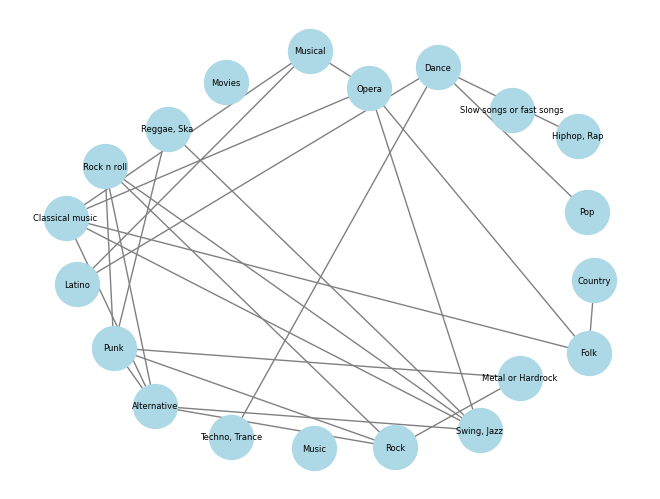

In [7]:
data_subset = data.iloc[:, :20]

# Calcular a correlação
correlation_matrix = data_subset.corr()


G = nx.Graph()


for gosto in data_subset.columns:
    G.add_node(gosto)

# Adicionar arestas ao grafo
num_gostos = len(data_subset.columns)
for i in range(num_gostos):
    for j in range(i + 1, num_gostos):
        correlation = correlation_matrix.iloc[i, j]
        #Adiciona Arestas apenas aos vértices cuja correlação é maior que 0.3
        if correlation > 0.3:
            G.add_edge(data_subset.columns[i], data_subset.columns[j])


pos = nx.spring_layout(G,k=4)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', font_size=6)
plt.show()

### Representação em grafo de 20 colunas aleatórias

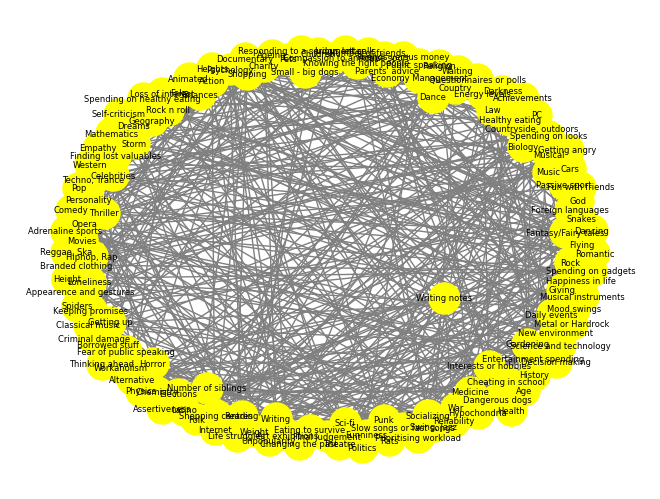

In [9]:
data_subset = data

# Calcular a correlação
correlation_matrix = data_subset.corr()


G = nx.Graph()


for gosto in data_subset.columns:
    G.add_node(gosto)

# Adicionar arestas ao grafo
num_gostos = len(data_subset.columns)
for i in range(num_gostos):
    for j in range(i + 1, num_gostos):
        correlation = correlation_matrix.iloc[i, j]
        #Adiciona Arestas apenas aos vértices cuja correlação é maior que 0.2
        if correlation > 0.2:  
            G.add_edge(data_subset.columns[i], data_subset.columns[j])


pos = nx.spring_layout(G,k=4)
nx.draw(G, pos, with_labels=True, node_color='yellow', node_size=500, edge_color='gray', font_size=6)
plt.show()